In [ ]:
pip install geopandas

In [17]:
import geopandas as gpd
import rasterio
from rasterio.mask import mask
from shapely.geometry import mapping

In [18]:
# Path to the GeoTIFF file and the shapefile
tiff_file = 'D:/Jintu/Jintu_LULC/LULC Results/Tiff File/Tiff File/1990.tif'
shapefile = 'D:/Jintu/Jintu_LULC/LULC Results/Tiff File/Boundary/boundary.shp'

# Read the shapefile using geopandas
shape = gpd.read_file(shapefile)

# Open the GeoTIFF file
src = rasterio.open(tiff_file)

# Ensure CRS compatibility
shape = shape.to_crs(src.crs)

# Get the geometry in the required format
geoms = [mapping(geom) for geom in shape.geometry]

# Check for valid geometries in the shapefile
if not geoms:
    raise ValueError("Shapefile contains no valid geometries.")

try:
    # Clip the GeoTIFF file using the shapefile
    out_image, out_transform = mask(src, geoms, crop=True)
    out_meta = src.meta.copy()

    # Update the metadata for the clipped file
    out_meta.update({"driver": "GTiff",
                     "height": out_image.shape[1],
                     "width": out_image.shape[2],
                     "transform": out_transform})

    # Output path for the clipped GeoTIFF file
    clipped_tiff_path = 'D:/Jintu/Jintu_LULC/LULC Results/Tiff File/Clipped/clipped_1990.tif'
    # Write the clipped data to a new GeoTIFF file
    with rasterio.open(clipped_tiff_path, "w", **out_meta) as dest:
        dest.write(out_image)

    print("Clipping successful. Clipped file saved at:", clipped_tiff_path)

except Exception as e:
    print("An error occurred during clipping:", e)

finally:
    # Close the rasterio dataset
    src.close()

Clipping successful. Clipped file saved at: D:/Jintu/Jintu_LULC/LULC Results/Tiff File/Clipped/clipped_1990.tif


In [22]:
import os
import geopandas as gpd
import rasterio
from rasterio.mask import mask
from shapely.geometry import mapping

# Path to the shapefile for clipping
shapefile = 'D:/Jintu/Jintu_LULC/15Dec_2023/Unet_LULC/Reclass/NF_F_Boundary/Forest_Mask/Forest Mask.shp'

# Read the shapefile using geopandas
# Read the shapefile using geopandas
shape = gpd.read_file(shapefile)

# Open the GeoTIFF file
src = rasterio.open(tiff_file)

# Ensure CRS compatibility
shape = shape.to_crs(src.crs)

# Input and output directories
input_folder = 'D:/Jintu/Jintu_Disturbnace/15Dec_2023/ccdc/Images/'
output_folder = 'D:/Jintu/Jintu_Disturbnace/15Dec_2023/ccdc/Forest_Mask'

# Iterate through each GeoTIFF file in the input directory
for filename in os.listdir(input_folder):
    if filename.endswith('.tif') or filename.endswith('.tiff'):
        tiff_file = os.path.join(input_folder, filename)

        # Open the GeoTIFF file
        src = rasterio.open(tiff_file)

        # Get the geometry in the required format
        geoms = [mapping(geom) for geom in shape.geometry]

        # Clip the GeoTIFF file using the shapefile
        out_image, out_transform = mask(src, geoms, crop=True)
        out_meta = src.meta.copy()

        # Update the metadata for the clipped file
        out_meta.update({"driver": "GTiff",
                         "height": out_image.shape[1],
                         "width": out_image.shape[2],
                         "transform": out_transform})

        # Output path for the clipped GeoTIFF file
        clipped_tiff_path = os.path.join(output_folder, f"{os.path.splitext(filename)[0]}_clipped.tif")

        # Write the clipped data to a new GeoTIFF file
        with rasterio.open(clipped_tiff_path, "w", **out_meta) as dest:
            dest.write(out_image)

        # Close the rasterio dataset
        src.close()

print("All GeoTIFF files have been clipped and saved to the output directory.")


All GeoTIFF files have been clipped and saved to the output directory.


In [ ]:
import rasterio
import matplotlib.pyplot as plt
import numpy as np

# Paths to the two TIFF images
image_path_1 = "D:/Jintu/Jintu_LULC/LULC Results/Tiff File/Clipped/rf_mask_1_clipped.tif"
image_path_2 = "D:/Jintu/Jintu_LULC/LULC Results/Tiff File/Clipped/2022_clipped.tif"

# Open the images using rasterio
with rasterio.open(image_path_1) as src1, rasterio.open(image_path_2) as src2:
    # Read the image data (assuming the data is in the first band)
    data1 = src1.read(1)
    data2 = src2.read(1)

    # Flatten the 2D arrays to 1D for histogram plotting
    flattened_data1 = data1.flatten()
    flattened_data2 = data2.flatten()

    # Plotting histograms for each image
    plt.figure(figsize=(10, 6))
    
    # Histogram for Image 1
    plt.hist(flattened_data1, bins=np.arange(1, 8) - 0.5, alpha=0.5, label='Image 1', color='blue', edgecolor='black')
    
    # Histogram for Image 2
    plt.hist(flattened_data2, bins=np.arange(1, 8) - 0.5, alpha=0.5, label='Image 2', color='orange', edgecolor='black')
    
    plt.xlabel('Class')
    plt.ylabel('Frequency')
    plt.title('Class Distribution Comparison')
    plt.xticks(np.arange(1, 7))
    plt.legend()
    plt.grid(True)
    plt.show()


In [ ]:
# Open and read the two images using rasterio
with rasterio.open(image_path_1) as src1, rasterio.open(image_path_2) as src2:
    # Read image data
    data1 = src1.read(1)  # Assuming data is in the first band
    data2 = src2.read(1)

    # Check if the dimensions of both images are the same
    if data1.shape != data2.shape:
        print("Image dimensions do not match.")
    else:
        # Initialize a counter for different pixels
        different_pixels = 0

        # Compare pixel values between the two images
        for row in range(data1.shape[0]):
            for col in range(data1.shape[1]):
                if data1[row, col] != data2[row, col]:
                    different_pixels += 1  # Increment counter for different pixels

        # Output the number of different pixels found
        print(f"Total different pixels: {different_pixels}")

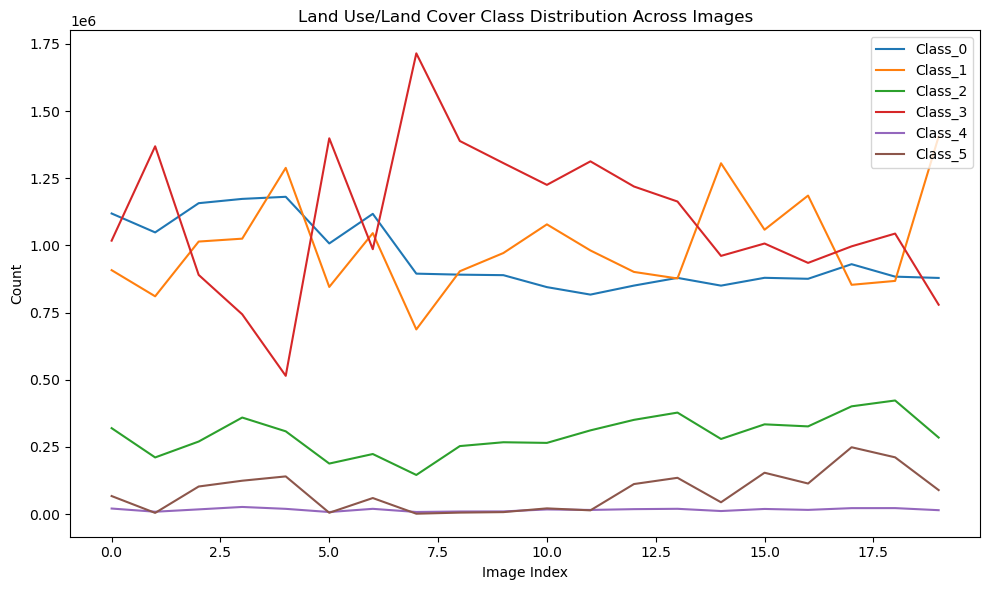

In [9]:
import os
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Path to the folder containing all GeoTIFF images
folder_path = 'D:/Jintu/Jintu_LULC/14Dec_2023/Clipped_result'

# Initialize a list to store counts for each class
class_counts = {f'Class_{i}': [] for i in range(0, 6)}

# Loop through each TIFF file in the folder
for file in os.listdir(folder_path):
    if file.endswith('.tif'):
        file_path = os.path.join(folder_path, file)
        
        # Open the GeoTIFF file
        with rasterio.open(file_path) as src:
            data = src.read(1)  # Assuming data is in the first band
            
            # Count occurrences of each class and update the dictionary
            for i in range(0, 6):
                class_counts[f'Class_{i}'].append(np.sum(data == i))

# Plotting the area graph
plt.figure(figsize=(10, 6))

for class_name, counts in class_counts.items():
    plt.plot(counts, label=class_name)

plt.xlabel('Image Index')
plt.ylabel('Count')
plt.title('Land Use/Land Cover Class Distribution Across Images')
plt.legend()
plt.tight_layout()

plt.show()


In [10]:
import pandas as pd
# Pixel size in square meters
pixel_size_m2 = 30 * 30  # 900 square meters per pixel

# Path to the folder containing all GeoTIFF images

# Initialize a dictionary to store class areas for each image
class_areas = {}

# Loop through each TIFF file in the folder
image_count = 0

for file in os.listdir(folder_path):
    if file.endswith('.tif'):
        file_path = os.path.join(folder_path, file)
        
        # Open the GeoTIFF file
        with rasterio.open(file_path) as src:
            data = src.read(1)  # Assuming data is in the first band

            # Initialize a dictionary for each image
            image_count += 1
            image_key = f'Image_{image_count}'
            class_areas[image_key] = {f'Class_{j}': np.sum(data == j) for j in range(0, 6)}

# Convert counts to area in square meters
total_pixels_per_image = src.width * src.height  # Assuming all images have the same dimensions

for img, classes in class_areas.items():
    total_pixels = sum(classes.values())
    total_percentage = 0
    for cls, count in classes.items():
        percentage = count / total_pixels_per_image * 100
        total_percentage += percentage
        class_areas[img][cls] = percentage

    # Normalize to ensure total percentage sums up to 100 for these 6 classes
    for cls, count in classes.items():
        class_areas[img][cls] = (class_areas[img][cls] / total_percentage) * 100

    # Add total pixel count for all classes
    class_areas[img]['Total_Pixels'] = total_pixels

    # Convert pixel count to area in square kilometers (km²)
    area_km2 = total_pixels * pixel_size_m2 / 1000000  # Conversion from square meters to square kilometers
    class_areas[img]['Total_Area_km2'] = area_km2

# Create a DataFrame from the calculated percentages and area
df = pd.DataFrame(class_areas).T  # Transpose for better visibility
df.index.name = 'Image'

print(df)

            Class_0    Class_1    Class_2    Class_3   Class_4   Class_5  \
Image                                                                      
Image_1   32.409417  26.298554   9.265432  29.480207  0.600041  1.946347   
Image_2   30.370609  23.480895   6.109270  39.654348  0.255398  0.129480   
Image_3   33.520949  29.383488   7.823132  25.787411  0.509608  2.975411   
Image_4   33.983023  29.695950  10.410015  21.541239  0.770046  3.599727   
Image_5   34.209049  37.327787   8.925192  14.907154  0.566614  4.064205   
Image_6   29.179854  24.489132   5.448978  40.514712  0.223245  0.144079   
Image_7   32.371297  30.292255   6.476797  28.559536  0.567860  1.732256   
Image_8   25.923873  19.910453   4.220305  49.674445  0.228256  0.042668   
Image_9   25.815364  26.184224   7.333540  40.224583  0.280946  0.161343   
Image_10  25.760299  28.147111   7.746486  37.842869  0.289173  0.214063   
Image_11  24.470593  31.236911   7.677314  35.495568  0.502077  0.617537   
Image_12  23

C:\Users\mrg22-020914479\AppData\Local\Temp\ipykernel_12884\1384547155.py:45: RuntimeWarning: overflow encountered in scalar multiply
  area_km2 = total_pixels * pixel_size_m2 / 1000000  # Conversion from square meters to square kilometers


In [11]:
# Initialize a dictionary to store class areas for each image
class_areas = {}

# Loop through each TIFF file in the folder
for file in os.listdir(folder_path):
    if file.endswith('.tif'):
        file_path = os.path.join(folder_path, file)
        
        # Open the GeoTIFF file
        with rasterio.open(file_path) as src:
            data = src.read(1)  # Assuming data is in the first band

            # Extract the image name from the file name
            image_name = os.path.splitext(file)[0]

            # Initialize a dictionary for each image
            class_areas[image_name] = {f'Class_{j}': np.sum(data == j) for j in range(0, 6)}

            # Convert counts to area in square meters
            total_pixels_per_image = src.width * src.height  # Assuming all images have the same dimensions

            total_pixels = sum(class_areas[image_name].values())
            total_percentage = 0
            for cls, count in class_areas[image_name].items():
                percentage = count / total_pixels_per_image * 100
                total_percentage += percentage
                class_areas[image_name][cls] = percentage

            # Normalize to ensure the total percentage sums up to 100 for these 6 classes
            for cls, count in class_areas[image_name].items():
                class_areas[image_name][cls] = (class_areas[image_name][cls] / total_percentage) * 100

            # Add total pixel count for all classes
            class_areas[image_name]['Total_Pixels'] = total_pixels

            # Convert pixel count to area in square kilometers (km²)
            area_km2 = total_pixels * pixel_size_m2 / 1000000  # Conversion from square meters to square kilometers
            class_areas[image_name]['Total_Area_km2'] = area_km2

# Create a DataFrame from the calculated percentages and area
df = pd.DataFrame(class_areas).T  # Transpose for better visibility
df.index.name = 'Image'

print(df)

C:\Users\mrg22-020914479\AppData\Local\Temp\ipykernel_12884\228866774.py:37: RuntimeWarning: overflow encountered in scalar multiply
  area_km2 = total_pixels * pixel_size_m2 / 1000000  # Conversion from square meters to square kilometers


                  Class_0    Class_1    Class_2    Class_3   Class_4  \
Image                                                                  
1990_clipped    32.409417  26.298554   9.265432  29.480207  0.600041   
1991_clipped    30.370609  23.480895   6.109270  39.654348  0.255398   
1992_clipped    33.520949  29.383488   7.823132  25.787411  0.509608   
1993_clipped    33.983023  29.695950  10.410015  21.541239  0.770046   
1994_clipped    34.209049  37.327787   8.925192  14.907154  0.566614   
1995_clipped    29.179854  24.489132   5.448978  40.514712  0.223245   
1997_clipped    32.371297  30.292255   6.476797  28.559536  0.567860   
1999_clipped    25.923873  19.910453   4.220305  49.674445  0.228256   
2001_clipped    25.815364  26.184224   7.333540  40.224583  0.280946   
2003_clipped    25.760299  28.147111   7.746486  37.842869  0.289173   
2005_clipped    24.470593  31.236911   7.677314  35.495568  0.502077   
2009_clipped    23.664513  28.423625   9.027820  38.030833  0.44

In [12]:
FOLDER_SAVE="D:/Jintu/Jintu_LULC/14Dec_2023/Excels/"
df.to_csv(FOLDER_SAVE+'LULC_1990_23.csv')

In [16]:
import os
import rasterio
import numpy as np
import pandas as pd

# Assuming pixel size in square meters
pixel_size_m2 = 30  # Adjust this according to your data

# Folder path containing the TIFF files
folder_path = 'D:/Jintu/Jintu_LULC/15Dec_2023/Unet_LULC/Reclass/Result_Reclass'

# Initialize a dictionary to store class areas for each image
class_counts = {}

# Loop through each TIFF file in the folder
for file in os.listdir(folder_path):
    if file.endswith('.tif'):
        file_path = os.path.join(folder_path, file)

        # Open the GeoTIFF file
        with rasterio.open(file_path) as src:
            data = src.read(1)  # Assuming data is in the first band

            # Extract the image name from the file name
            image_name = os.path.splitext(file)[0]

            # Initialize a dictionary for each image
            class_counts[image_name] = {f'Class_{j}': np.sum(data == j) for j in range(0, 6)}

            # Add total pixel count for all classes
            class_counts[image_name]['Total_Pixels'] = np.sum(data)

# Create a DataFrame from the calculated pixel counts
df = pd.DataFrame(class_counts).T  # Transpose for better visibility
df.index.name = 'Image'

print(df)


       Class_0  Class_1 Class_2  Class_3 Class_4 Class_5 Total_Pixels
Image                                                                
1990   1131265   895488  319867  1017734   20715   67193      5007249
1991   1084543   774552  210908  1368972    8817    4470      5360902
1992   1168017  1003609  270075   890249   17593  102719      4798473
1993   1181775  1016590  359381   743660   26584  124272      4694028
1994   1190372  1279267  308121   514634   19561  140307      4219190
1995   1056412   796382  188113  1398674    7707    4974      5424328


In [14]:
FOLDER_SAVE="D:/Jintu/Jintu_LULC/14Dec_2023/Excels/"
df.to_csv(FOLDER_SAVE+'LULC_pixels.csv')

In [ ]:
#CHECK NAN VALUE

In [27]:
import rasterio
import numpy as np

def check_nan_values(raster_file):
    with rasterio.open(raster_file) as src:
        # Read raster data into a NumPy array
        raster_data = src.read()

    # Check for NaN values in the NumPy array
    nan_values = np.isnan(raster_data)

    if np.any(nan_values):
        print(f"Raster file '{raster_file}' contains NaN values.")
        # Optionally, print the count and locations of NaN values
        nan_count = np.sum(nan_values)
        print(f"Number of NaN values: {nan_count}")
        nan_indices = np.argwhere(nan_values)
        print("Indices of NaN values:")
        for idx in nan_indices:
            print(f"  Row: {idx[0]}, Column: {idx[1]}, Band: {idx[2]}")
    else:
        print(f"Raster file '{raster_file}' does not contain any NaN values.")

# Example usage
raster_file_path = "D:/Jintu/Jintu_GEDI/ReUse/Data/Sonitpur/sentinel/2022/4/3/B02_20220403.tif"
check_nan_values(raster_file_path)



Raster file 'D:/Jintu/Jintu_GEDI/ReUse/Data/Sonitpur/sentinel/2022/4/3/B02_20220403.tif' does not contain any NaN values.


In [17]:
import rasterio
import numpy as np

def replace_nan_with_zero_and_save(input_file, output_file):
    with rasterio.open(input_file) as src:
        # Read raster data into a NumPy array
        raster_data = src.read()

        # Replace NaN values with zero
        raster_data = np.nan_to_num(raster_data, copy=True, nan=0.0)

        # Create a new GeoTIFF file with the modified array
        with rasterio.open(output_file, 'w', **src.profile) as dst:
            dst.write(raster_data)

if __name__ == "__main__":
    # Example usage
    input_raster_path = "D:/Jintu/Jintu_GEDI/ReUse/Data/Sonitpur/sentinel/2022/4/3/Sentinel_B12.tif"
    output_raster_path = "D:/Jintu/Jintu_GEDI/ReUse/Data/Sonitpur/sentinel/2022/4/NO_NAN/Sentinel_B12.tif"

    replace_nan_with_zero_and_save(input_raster_path, output_raster_path)


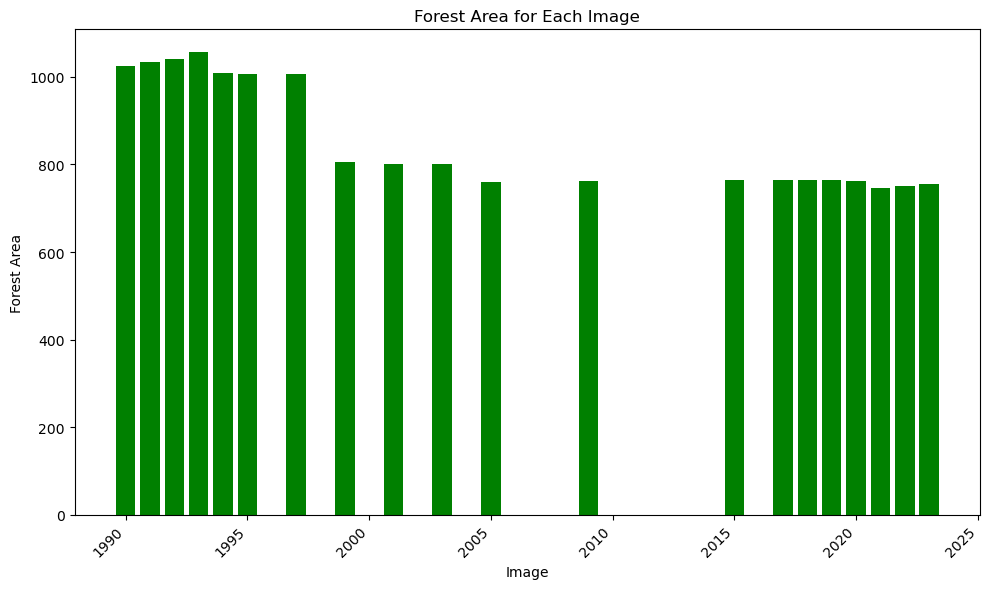

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Replace 'your_csv_file.csv' with the actual path to your CSV file
csv_file_path = 'D:/Jintu/Jintu_LULC/14Dec_2023/Excels/LULC_pixels.csv'

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(csv_file_path)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(df['Image'], df['Forest Area'], color='green')
plt.xlabel('Image')
plt.ylabel('Forest Area')
plt.title('Forest Area for Each Image')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()
